In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('Data.csv')

In [18]:
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spatial Aggregation

In [19]:
#Question1 --------------->>>>>
avg_pm25 = data.groupby("state")["PM2.5"].mean()
highest_avg_state = avg_pm25.idxmax()
highest_avg_value = avg_pm25.max()
print(f"State with hightest average PM2.5 is {highest_avg_state} with {highest_avg_value}  µg/m³")

State with hightest average PM2.5 is Delhi with 104.1009176780069  µg/m³


In [20]:
#Question2 ------------->>>
# Convert Timestamp column to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Year"] = data["Timestamp"].dt.year

hazard_2023 = data[(data["Year"] == 2023) & (data["PM2.5"] > 300)]
hazardous_state = hazard_2023["state"].value_counts().idxmax()
hazardous_days = hazard_2023["state"].value_counts().max()
print(f"State with most hazardous PM2.5 days in 2023: {hazardous_state} ({hazardous_days} days)")

State with most hazardous PM2.5 days in 2023: Delhi (470 days)


In [21]:
#Question3------------------>>>>>
variability_2023 = data[data["Year"] == 2023].groupby("state")["PM2.5"].std()
highest_variability_state = variability_2023.idxmax()
highest_variability_value = variability_2023.max()

print(f"State with highest variability in PM2.5 in 2023: {highest_variability_state} (Std Dev: {highest_variability_value:.2f})")

State with highest variability in PM2.5 in 2023: Delhi (Std Dev: 82.80)


In [22]:
#Question4----------------->>>>>>
covid_period = data[(data["Year"] >= 2020) & (data["Year"] <= 2021)]
lowest_pm25_covid_state = covid_period.groupby("state")["PM2.5"].mean().idxmin()
lowest_pm25_covid_value = covid_period.groupby("state")["PM2.5"].mean().min()

print(f"State with lowest average PM2.5 during Covid (2020-2021): {lowest_pm25_covid_state} ({lowest_pm25_covid_value:.2f} µg/m³)")

State with lowest average PM2.5 during Covid (2020-2021): Mizoram (14.32 µg/m³)


Temporal Aggregation

In [23]:
#Question1--------->>
# 1. Station with the highest PM2.5 value in August 2020 -->
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Month"] = data["Timestamp"].dt.month

aug_2020 = data[(data["Year"] == 2020) & (data["Month"] == 8)]
highest_station_aug_2020 = aug_2020.loc[aug_2020["PM2.5"].idxmax(), "station"]
highest_value_aug_2020 = aug_2020["PM2.5"].max()

print(f"Station with highest PM2.5 in Aug 2020: {highest_station_aug_2020} ({highest_value_aug_2020:.2f} µg/m³)")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


In [24]:
#Question2----------->>
# 2. Seasonal average PM2.5 for 2018 at specific stations
season_def = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

stations = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
seasonal_avg_2018 = {}

for season, months in season_def.items():
    seasonal_data = data[(data["Year"] == 2018) & (data["Month"].isin(months)) & (data["station"].isin(stations))]
    seasonal_avg_2018[season] = seasonal_data["PM2.5"].mean()

highest_pollution_season = max(seasonal_avg_2018, key=seasonal_avg_2018.get)

print(f"Season with highest PM2.5 in 2018 at given stations: {highest_pollution_season}")

Season with highest PM2.5 in 2018 at given stations: Winter


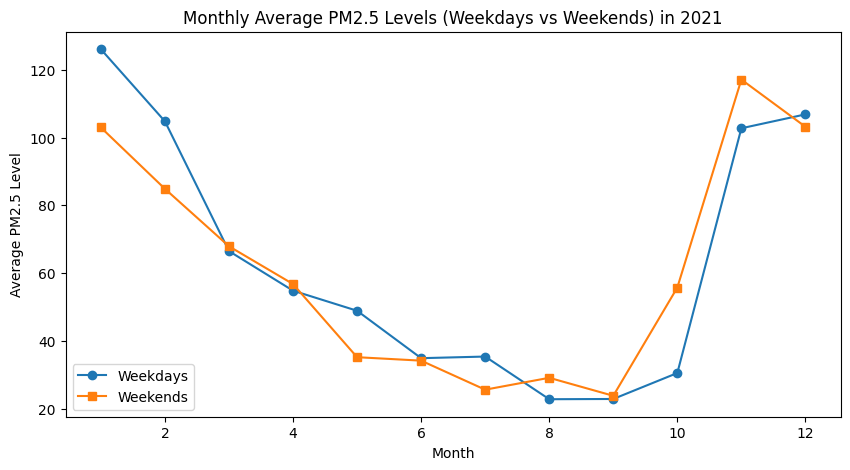

In [25]:
#Question3------------->>
import matplotlib.pyplot as plt
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Day"] = data["Timestamp"].dt.day
data_2021 = data[data["Year"] == 2021]
weekday_avg = data_2021[data_2021["Day"] < 5].groupby("Month")["PM2.5"].mean()
weekend_avg = data_2021[data_2021["Day"] >= 5].groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10,5))
plt.plot(weekday_avg.index, weekday_avg.values, label='Weekdays', marker='o')
plt.plot(weekend_avg.index, weekend_avg.values, label='Weekends', marker='s')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021')
plt.legend()
plt.show()

Spatial Temporal Aggregation

In [26]:
#Question1--------------------->>>>>>>>>

#Percentage change in PM2.5 levels between monsoon and summer in 2022
monsoon_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Monsoon"]))].groupby("state")["PM2.5"].mean()
summer_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Summer"]))].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_2022 - summer_2022) / summer_2022) * 100
state_max_change = percentage_change.idxmax()
max_change_value = percentage_change.max()

print(f"State with most change in PM2.5 levels from Summer to Monsoon in 2022: {state_max_change} ({max_change_value:.2f}%)")

State with most change in PM2.5 levels from Summer to Monsoon in 2022: Jammu and Kashmir (-0.00%)


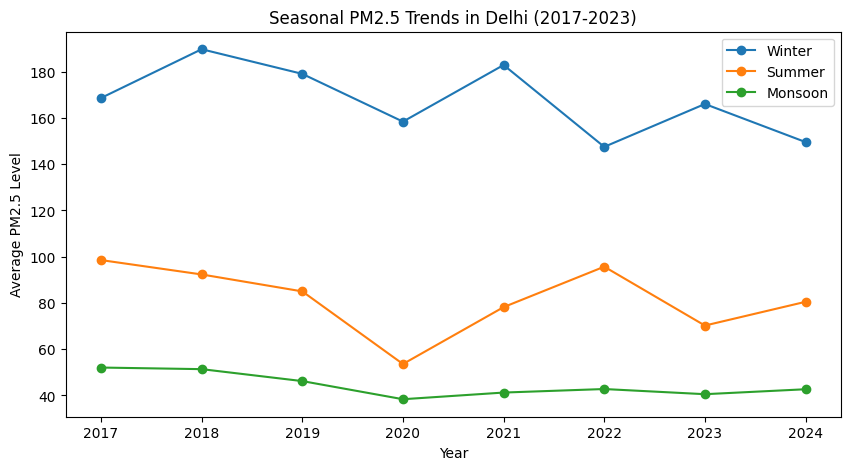

In [27]:
#Question2----------------->>>>>>>
#Seasonal PM2.5 trends for Delhi from 2017-2023
delhi_data = data[data["state"] == "Delhi"]
seasonal_pm25 = {season: delhi_data[delhi_data["Month"].isin(months)].groupby("Year")["PM2.5"].mean() for season, months in season_def.items()}

plt.figure(figsize=(10,5))
for season, values in seasonal_pm25.items():
    plt.plot(values.index, values.values, label=season, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Seasonal PM2.5 Trends in Delhi (2017-2023)')
plt.legend()
plt.show()


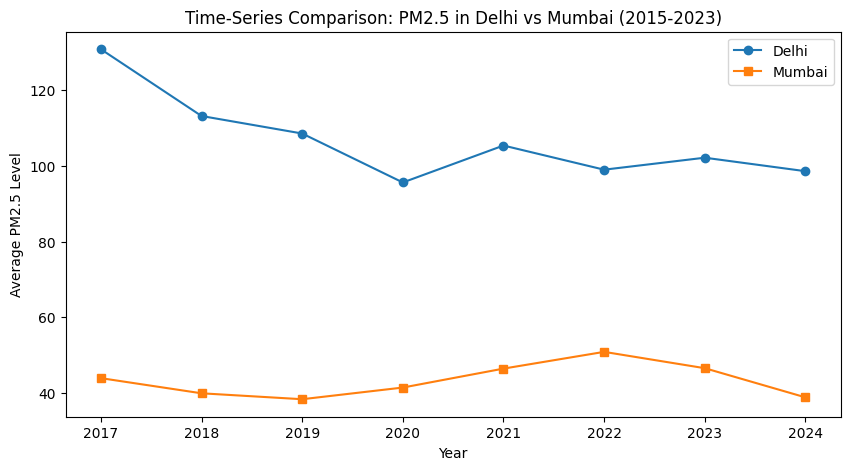

In [28]:
#Question3 ------------------------>>>
#Time-series comparison of Delhi and Mumbai PM2.5 levels
delhi_pm25 = data[data["state"] == "Delhi"].groupby("Year")["PM2.5"].mean()
mumbai_pm25 = data[data["state"] == "Maharashtra"].groupby("Year")["PM2.5"].mean()
plt.figure(figsize=(10,5))
plt.plot(delhi_pm25.index, delhi_pm25.values, label='Delhi', marker='o')
plt.plot(mumbai_pm25.index, mumbai_pm25.values, label='Mumbai', marker='s')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Time-Series Comparison: PM2.5 in Delhi vs Mumbai (2015-2023)')
plt.legend()
plt.show()

Population Based

In [29]:
#Question1--------------->>
# 1. State with the highest number of monitoring stations relative to its population
state_data = pd.read_csv("State_data.csv")
station_counts = data["state"].value_counts()
state_data["Stations_Per_Capita"] = state_data["State"].map(station_counts) / state_data["Population"]
highest_stations_per_capita_state = state_data.set_index("State")["Stations_Per_Capita"].idxmax()

print(f"State with the highest number of monitoring stations relative to its population: {highest_stations_per_capita_state}")

State with the highest number of monitoring stations relative to its population: Chandigarh


In [30]:
#Question2 -------------->>
# 2. Top 5 most polluted states per capita in 2023
pollution_2023 = data[data["Year"] == 2023].groupby("state")["PM2.5"].mean()
state_data["Per_Capita_PM2.5"] = state_data["State"].map(pollution_2023) / state_data["Population"]
top_5_polluted_states = state_data.nlargest(5, "Per_Capita_PM2.5")

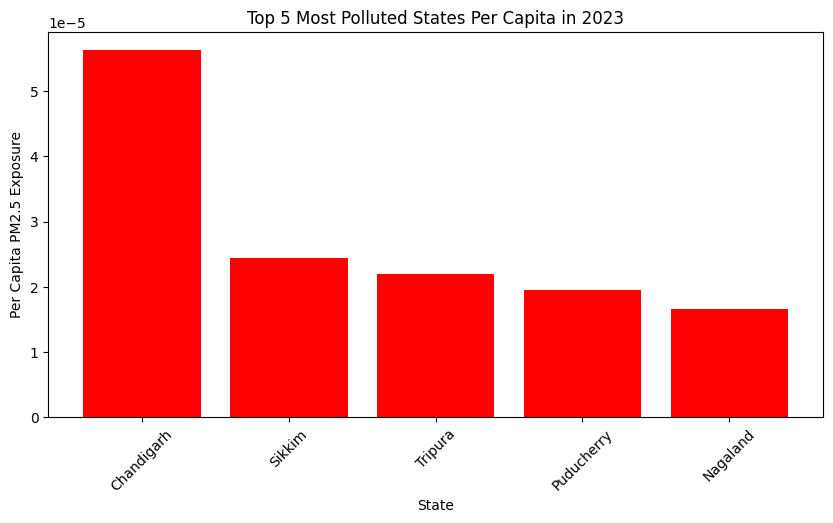

In [31]:

plt.figure(figsize=(10,5))
plt.bar(top_5_polluted_states["State"], top_5_polluted_states["Per_Capita_PM2.5"], color='red')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States Per Capita in 2023')
plt.xticks(rotation=45)
plt.show()

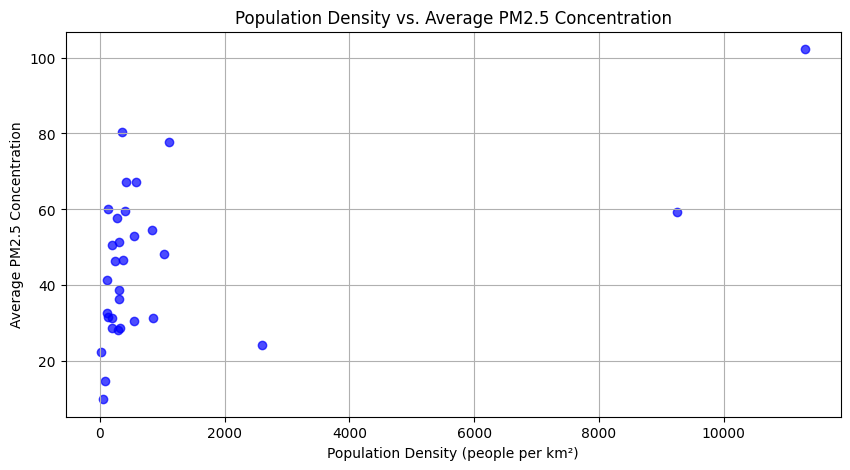

In [32]:
#Question3----------------->>>
# 3. Population Density vs. Average PM2.5 Concentration
state_data["Population_Density"] = state_data["Population"] / state_data["Area (km2)"]
state_data["Avg_PM2.5"] = state_data["State"].map(pollution_2023)

plt.figure(figsize=(10,5))
plt.scatter(state_data["Population_Density"], state_data["Avg_PM2.5"], color='blue', alpha=0.7)
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Population Density vs. Average PM2.5 Concentration')
plt.grid(True)
plt.show()


Area Based

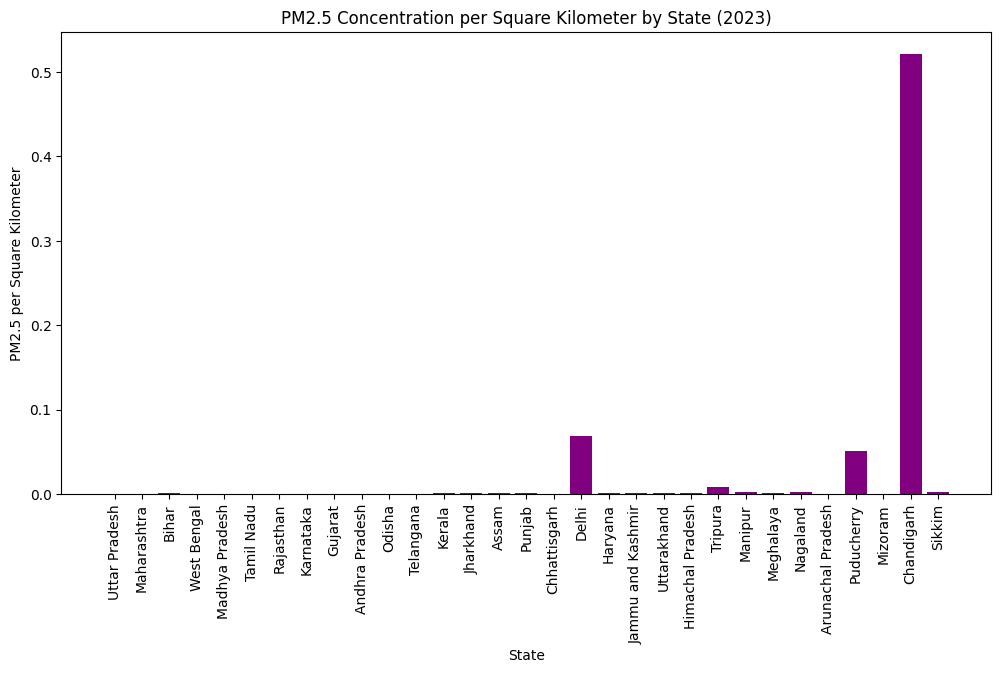

State with highest PM2.5 concentration per sq km: Chandigarh


In [33]:
pollution_2023 = data[data["Year"] == 2023].groupby("state")["PM2.5"].mean()
state_data["PM2.5_per_sq_km"] = state_data["State"].map(pollution_2023) / state_data["Area (km2)"]
highest_pm25_per_sq_km = state_data.set_index("State")["PM2.5_per_sq_km"].idxmax()

plt.figure(figsize=(12,6))
plt.bar(state_data["State"], state_data["PM2.5_per_sq_km"], color='purple')
plt.xlabel('State')
plt.ylabel('PM2.5 per Square Kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State (2023)')
plt.xticks(rotation=90)
plt.show()

print(f"State with highest PM2.5 concentration per sq km: {highest_pm25_per_sq_km}")

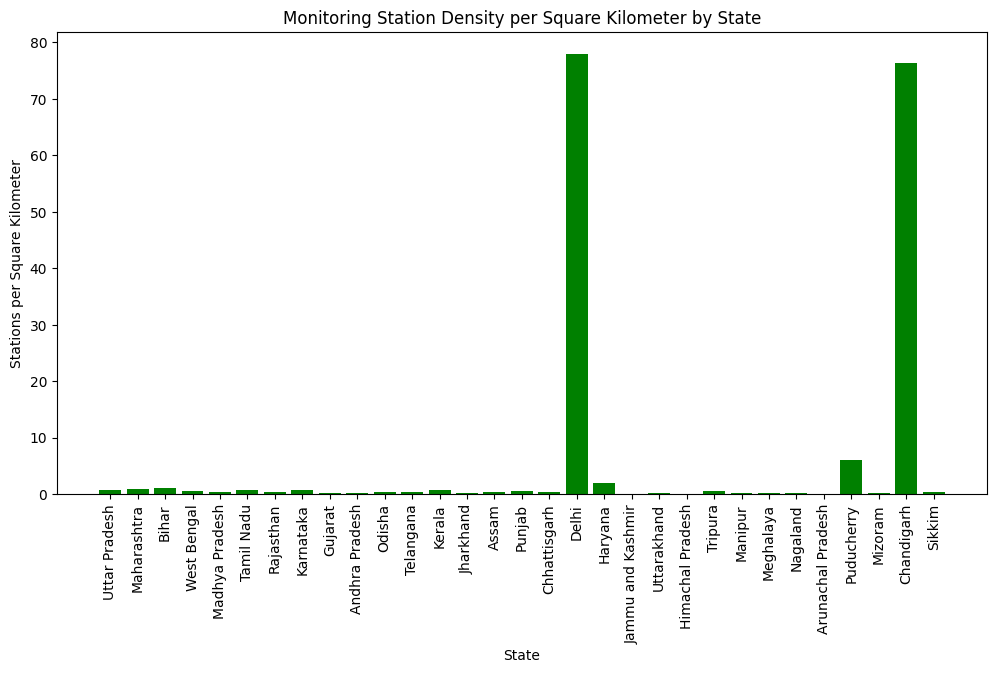

State with highest monitoring station density per sq km: Delhi


In [34]:
# Compute monitoring stations per square kilometer
station_counts = data["state"].value_counts()
state_data["Stations_Per_Sq_Km"] = state_data["State"].map(station_counts) / state_data["Area (km2)"]
highest_stations_density_state = state_data.set_index("State")["Stations_Per_Sq_Km"].idxmax()

plt.figure(figsize=(12,6))
plt.bar(state_data["State"], state_data["Stations_Per_Sq_Km"], color='green')
plt.xlabel('State')
plt.ylabel('Stations per Square Kilometer')
plt.title('Monitoring Station Density per Square Kilometer by State')
plt.xticks(rotation=90)
plt.show()

print(f"State with highest monitoring station density per sq km: {highest_stations_density_state}")

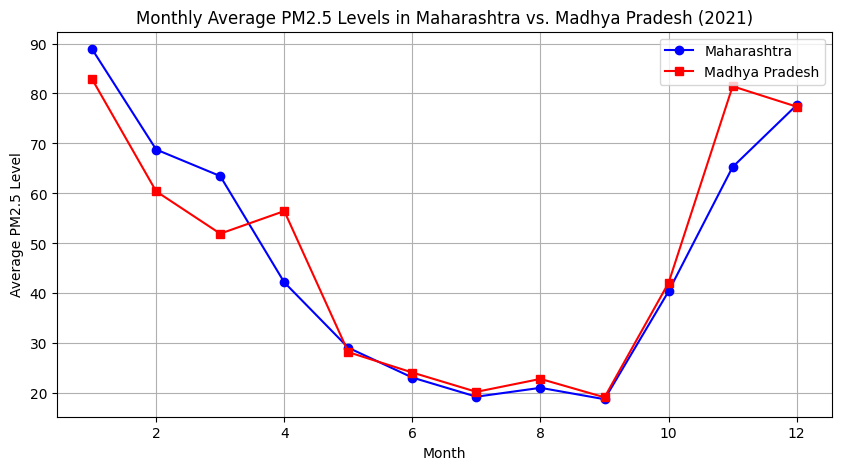

In [35]:
# Compare PM2.5 levels between Maharashtra and Madhya Pradesh in 2021
mp_maha_2021 = data[(data["Year"] == 2021) & (data["state"].isin(["Maharashtra", "Madhya Pradesh"]))]
pollution_comparison = mp_maha_2021.groupby(["state", "Month"])["PM2.5"].mean().unstack(level=0)

plt.figure(figsize=(10,5))
plt.plot(pollution_comparison.index, pollution_comparison["Maharashtra"], label='Maharashtra', marker='o', color='blue')
plt.plot(pollution_comparison.index, pollution_comparison["Madhya Pradesh"], label='Madhya Pradesh', marker='s', color='red')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Monthly Average PM2.5 Levels in Maharashtra vs. Madhya Pradesh (2021)')
plt.legend()
plt.grid(True)
plt.show()

Funding Based

In [36]:
import seaborn as sns

In [37]:
funding_data = pd.read_csv("NCAP_Funding.csv")

In [38]:
funding_data.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [39]:
# 1. Compare average PM2.5 levels between states with and without NCAP funding in 2021
funded_states = funding_data["State"].unique()
data_2021 = data[data["Year"] == 2021]
data_2021["Funded"] = data_2021["state"].isin(funded_states)
funding_comparison = data_2021.groupby("Funded")["PM2.5"].mean()
print("Average PM2.5 levels in 2021:")
print(funding_comparison)

Average PM2.5 levels in 2021:
Funded
False    60.326211
True     62.055055
Name: PM2.5, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8796\3508995872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Funded"] = data_2021["state"].isin(funded_states)


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8796\3810765094.py:5: SyntaxWarning: invalid escape sequence '\d'
  ncap_assam["Year"] = ncap_assam["Year"].str.extract("(\d{4})").astype(int)


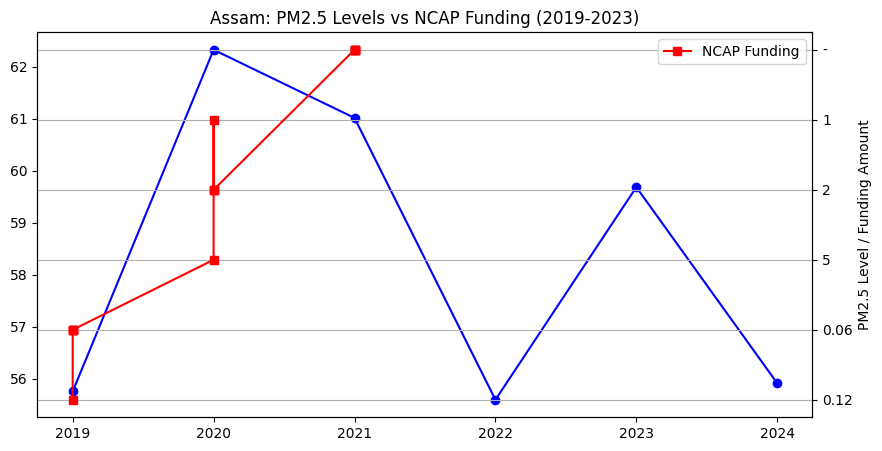

In [40]:
# 2. Time-series plot for Assam PM2.5 levels vs NCAP funding
data_assam = data[(data["state"] == "Assam") & (data["Year"] >= 2019)]
ncap_assam = funding_data[funding_data["State"] == "Assam"]
ncap_assam = ncap_assam.melt(id_vars=["State"], value_vars=["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"], var_name="Year", value_name="Funding")
ncap_assam["Year"] = ncap_assam["Year"].str.extract("(\d{4})").astype(int)
plt.figure(figsize=(10,5))
plt.plot(data_assam.groupby("Year")["PM2.5"].mean(), label='Average PM2.5', marker='o', color='blue')
plt.twinx()
plt.plot(ncap_assam["Year"], ncap_assam["Funding"], label='NCAP Funding', marker='s', color='red')
plt.xlabel("Year")
plt.ylabel("PM2.5 Level / Funding Amount")
plt.title("Assam: PM2.5 Levels vs NCAP Funding (2019-2023)")
plt.legend()
plt.grid()
plt.show()

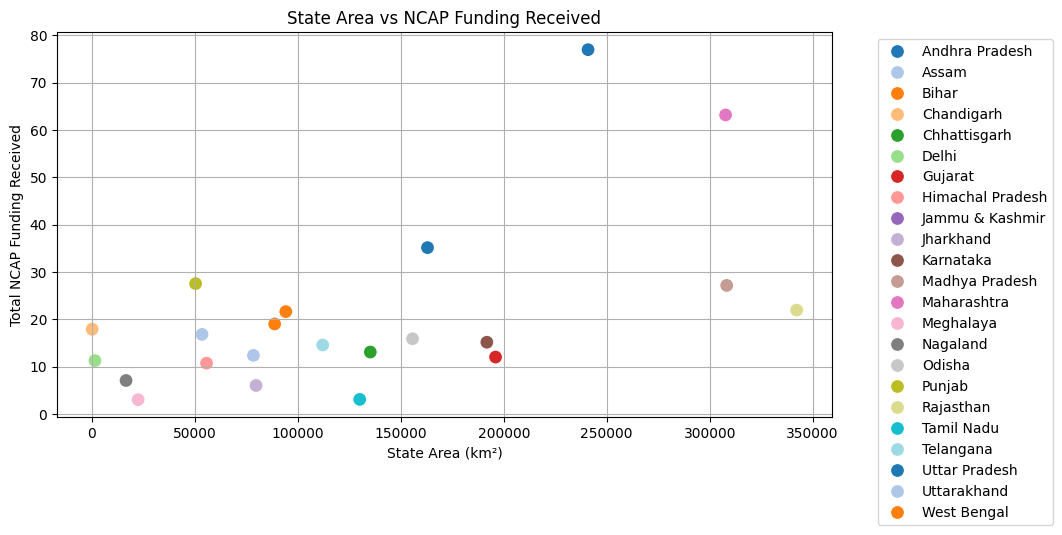

In [41]:
# 3. Scatter plot for area vs funding received by each state
state_funding = funding_data.groupby("State")["Total fund released"].sum().reset_index()
state_funding = state_funding.merge(state_data, on="State", how="left")

plt.figure(figsize=(10,5))
sns.scatterplot(x=state_funding["Area (km2)"], y=state_funding["Total fund released"], hue=state_funding["State"], palette="tab20", s=100)
plt.xlabel("State Area (km²)")
plt.ylabel("Total NCAP Funding Received")
plt.title("State Area vs NCAP Funding Received")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [42]:
# 1. Most polluted city in 2023 and percentage of hazardous days
pollution_2023 = data[data["Year"] == 2023].groupby("city")["PM2.5"].mean()
most_polluted_city = pollution_2023.idxmax()
most_polluted_data = data[(data["Year"] == 2023) & (data["city"] == most_polluted_city)]
hazardous_days_percentage = (most_polluted_data[most_polluted_data["PM2.5"] > 300].shape[0] / most_polluted_data.shape[0]) * 100

print(f"Most polluted city in 2023: {most_polluted_city}, Hazardous days percentage: {hazardous_days_percentage:.2f}%")


Most polluted city in 2023: Darbhanga, Hazardous days percentage: 0.82%


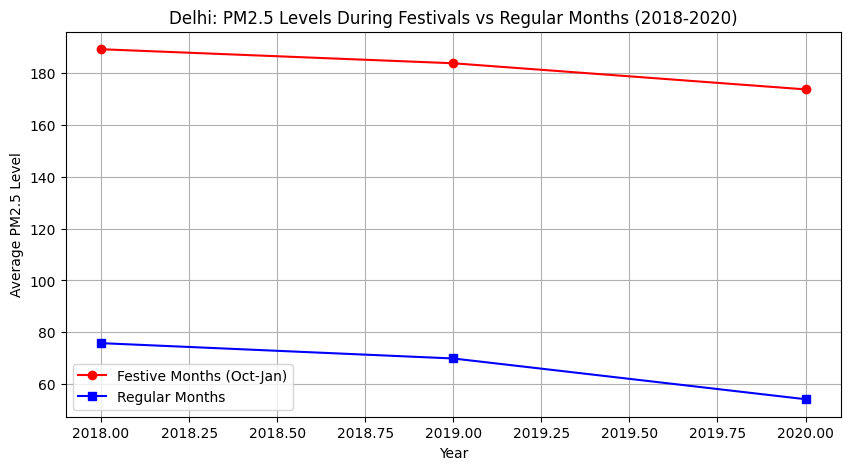

In [43]:
# 2. PM2.5 levels in Delhi during Diwali & New Year (2018-2020)
delhi_data = data[(data["state"] == "Delhi") & (data["Year"].isin([2018, 2019, 2020]))]
festive_months = delhi_data[delhi_data["Month"].isin([10, 11, 12, 1])]
regular_months = delhi_data[~delhi_data["Month"].isin([10, 11, 12, 1])]

plt.figure(figsize=(10,5))
plt.plot(festive_months.groupby("Year")["PM2.5"].mean(), label='Festive Months (Oct-Jan)', marker='o', color='red')
plt.plot(regular_months.groupby("Year")["PM2.5"].mean(), label='Regular Months', marker='s', color='blue')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Delhi: PM2.5 Levels During Festivals vs Regular Months (2018-2020)")
plt.legend()
plt.grid()
plt.show()

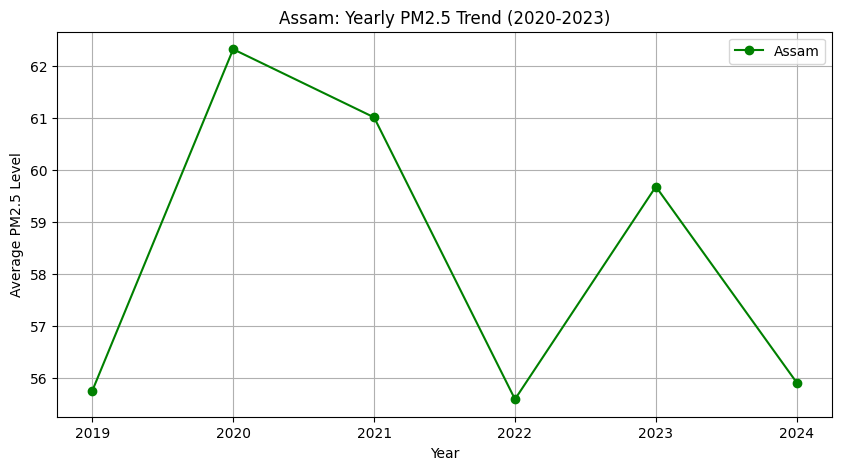

In [44]:
# 3. Highest NCAP funded state in 2020 and PM2.5 trend
highest_funded_state_2020 = funding_data.set_index("State")["Amount released during FY 2020-21"].idxmax()
state_pm25_trend = data[data["state"] == highest_funded_state_2020].groupby("Year")["PM2.5"].mean()

plt.figure(figsize=(10,5))
plt.plot(state_pm25_trend.index, state_pm25_trend.values, marker='o', color='green', label=highest_funded_state_2020)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title(f"{highest_funded_state_2020}: Yearly PM2.5 Trend (2020-2023)")
plt.legend()
plt.grid()
plt.show()

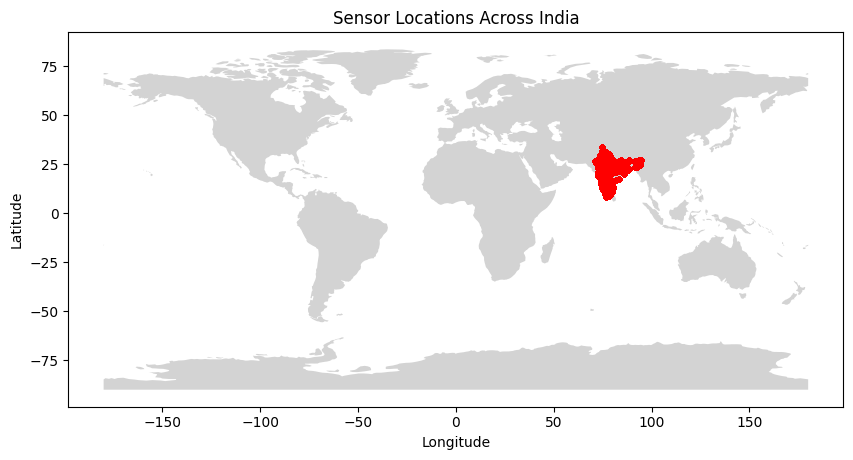

In [45]:
# 4. Draw India map and plot sensor locations
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geodatasets import get_path
data = pd.read_csv('Data.csv')
india_map = gpd.read_file(get_path('naturalearth.land'))
sensor_locations = data.dropna(subset=["latitude", "longitude"])

fig, ax = plt.subplots(figsize=(10,6))
india_map.plot(ax=ax, color='lightgrey')
plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color='red', s=10, alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sensor Locations Across India")
plt.show()